## DPDzero Data Assignment 

In [68]:
# import needed Librarys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date
import seaborn as sns

In [4]:
# Load the data sets
portfolio_data = pd.read_csv('Portfolio_data.csv')
CommunicationHistory = pd.read_csv('CommunicationHistory.csv')

In [5]:
portfolio_data.head()

,Loan Number,Due Date,State,DOB,Loan Amount
0,1003431,31-10-2022,KARNATAKA,09-02-1987 00:00,240000.0
1,1004356,31-10-2022,MAHARASHTRA,23-05-1994 00:00,56000.0
2,1004464,01-11-2022,UTTAR PRADESH,01-12-1996 00:00,50000.0
3,1004626,01-11-2022,KERALA,14-07-1995 00:00,63000.0
4,1005011,01-11-2022,MAHARASHTRA,30-05-1994 00:00,50000.0


In [6]:
# Check Null value and remove null value column
portfolio_data.isnull().sum()

Loan Number    0
Due Date       0
State          0
DOB            1
Loan Amount    0
dtype: int64

In [7]:
portfolio_data = portfolio_data.dropna()

In [8]:
portfolio_data.isnull().sum()

Loan Number    0
Due Date       0
State          0
DOB            0
Loan Amount    0
dtype: int64

#### 1. Distribution of loans across different states

In [9]:
portfolio_data['State'].value_counts()

MAHARASHTRA                  2538
KARNATAKA                    1892
TAMIL NADU                   1471
TELANGANA                    1306
UTTAR PRADESH                1198
ANDHRA PRADESH               1161
GUJARAT                       984
RAJASTHAN                     707
DELHI                         673
WEST BENGAL                   622
MADHYA PRADESH                592
HARYANA                       492
ODISHA                        415
BIHAR                         408
KERALA                        361
PUNJAB                        244
ASSAM                         187
CHATTISGARH                   160
JHARKHAND                     146
UTTARAKHAND                   103
HIMACHAL PRADESH               61
JAMMU & KASHMIR                51
Chandigarh                     31
Pondicherry                    31
Goa                            26
TRIPURA                        21
Meghalaya                      16
Nagaland                       13
Manipur                        12
Sikkim        

#### This Graph depicts the list of top 5 states of Highest Loan

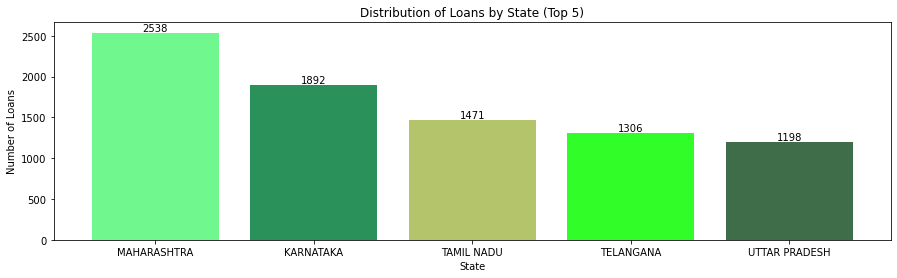

In [10]:
state_counts = portfolio_data['State'].value_counts().nlargest(5)

plt.figure(figsize=(15, 4))
bars = plt.bar(state_counts.index, state_counts.values, color=np.random.rand(5,3))

plt.bar_label(bars, labels=state_counts.values, label_type='edge')

plt.title('Distribution of Loans by State (Top 5)')
plt.xlabel('State')
plt.ylabel('Number of Loans')
plt.show()

#### Distribution of loans across different amounts

In [11]:
portfolio_data['Loan Amount'].value_counts()

5000.0     6756
7000.0     3474
5017.0     1050
10000.0     643
6000.0      348
           ... 
10140.0       1
15230.0       1
9006.0        1
7093.0        1
84000.0       1
Name: Loan Amount, Length: 304, dtype: int64

In [12]:
portfolio_data['Loan Amount'].value_counts().nlargest(5)

5000.0     6756
7000.0     3474
5017.0     1050
10000.0     643
6000.0      348
Name: Loan Amount, dtype: int64

Top amount to take Loan
1. 5000.0 ->  6757
2. 7000.0 ->  3474
3. 5017.0 ->  1050
4. 10000.0 -> 643
5. 6000.0  -> 348

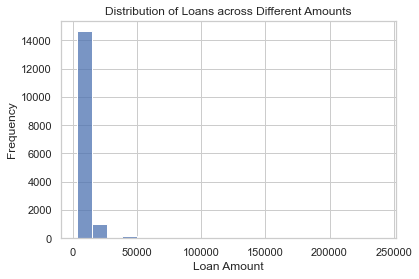

In [94]:
# create a histogram to show the distribution of loans across different amounts
sns.histplot(data=portfolio_data, x='Loan Amount', bins=20)
plt.title('Distribution of Loans across Different Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

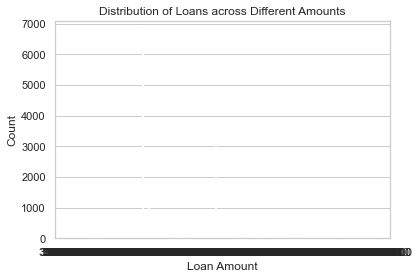

In [99]:
# create a bar chart to show the distribution of loans across different amounts
loan_amount_counts = portfolio_data['Loan Amount'].value_counts().sort_index()
sns.barplot(x=loan_amount_counts.index, y=loan_amount_counts.values)
plt.title('Distribution of Loans across Different Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

### Distribution of customers by age
**check the DOB and Due Date Data type and make change and remove unstructure rows**

In [13]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15961 entries, 0 to 15961
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Loan Number  15961 non-null  int64  
 1   Due Date     15961 non-null  object 
 2   State        15961 non-null  object 
 3   DOB          15961 non-null  object 
 4   Loan Amount  15961 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 748.2+ KB


In [14]:
# 0006-09-11 00:00:00 This DOB is not proper format
portfolio_data.drop(portfolio_data.loc[portfolio_data['DOB']=='0006-09-11 00:00:00'].index, inplace=True)

In [15]:
# change the Due Date and DOB data type object to datatime 
portfolio_data['DOB'] = pd.to_datetime(portfolio_data['DOB'])
portfolio_data['Due Date'] = pd.to_datetime(portfolio_data['Due Date'])

In [16]:
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15960 entries, 0 to 15961
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Loan Number  15960 non-null  int64         
 1   Due Date     15960 non-null  datetime64[ns]
 2   State        15960 non-null  object        
 3   DOB          15960 non-null  datetime64[ns]
 4   Loan Amount  15960 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 748.1+ KB


In [17]:
# Make new Age Column and calculate the age
now = pd.Timestamp('now')
portfolio_data['DOB'] = pd.to_datetime(portfolio_data['DOB'], format='%m%d%y')
portfolio_data['DOB'] = portfolio_data['DOB'].where(portfolio_data['DOB'] < now, portfolio_data['DOB'] -  np.timedelta64(100, 'Y'))
portfolio_data['Age'] = (now - portfolio_data['DOB']).astype('<m8[Y]')

In [18]:
portfolio_data.head(5)

,Loan Number,Due Date,State,DOB,Loan Amount,Age
0,1003431,2022-10-31,KARNATAKA,1987-09-02,240000.0,35.0
1,1004356,2022-10-31,MAHARASHTRA,1994-05-23,56000.0,28.0
2,1004464,2022-01-11,UTTAR PRADESH,1996-01-12,50000.0,27.0
3,1004626,2022-01-11,KERALA,1995-07-14,63000.0,27.0
4,1005011,2022-01-11,MAHARASHTRA,1994-05-30,50000.0,28.0


In [19]:
portfolio_data['Age'].value_counts()

24.0    1225
26.0    1148
23.0    1130
25.0    1116
27.0    1052
28.0    1041
22.0     959
29.0     906
30.0     858
31.0     730
32.0     662
21.0     586
33.0     578
34.0     499
35.0     444
36.0     359
37.0     344
20.0     337
38.0     254
39.0     233
40.0     209
19.0     162
42.0     153
41.0     145
43.0     127
44.0     119
45.0      74
46.0      69
48.0      63
47.0      58
49.0      57
53.0      42
52.0      40
50.0      40
18.0      37
51.0      31
55.0      16
54.0      15
59.0       9
58.0       6
56.0       6
62.0       5
57.0       4
64.0       3
60.0       3
63.0       2
79.0       1
71.0       1
70.0       1
68.0       1
Name: Age, dtype: int64

In [100]:
portfolio_data['Age'].value_counts().nlargest(5)

24.0    1225
26.0    1148
23.0    1130
25.0    1116
27.0    1052
Name: Age, dtype: int64

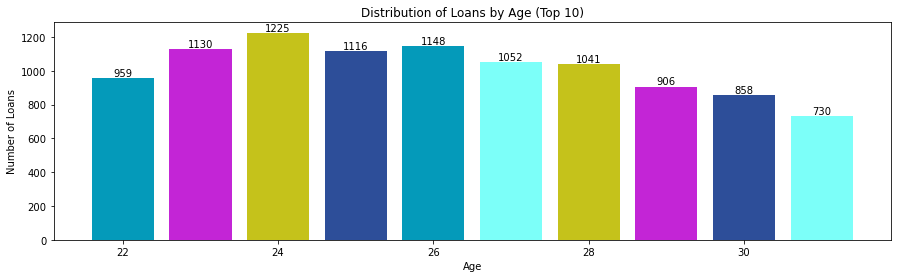

In [21]:
Age = portfolio_data['Age'].value_counts().nlargest(10)

plt.figure(figsize=(15, 4))
bars = plt.bar(Age.index, Age.values, color=np.random.rand(5,3))

plt.bar_label(bars, labels=Age.values, label_type='edge')

plt.title('Distribution of Loans by Age (Top 10)')
plt.xlabel('Age')
plt.ylabel('Number of Loans')
plt.show()

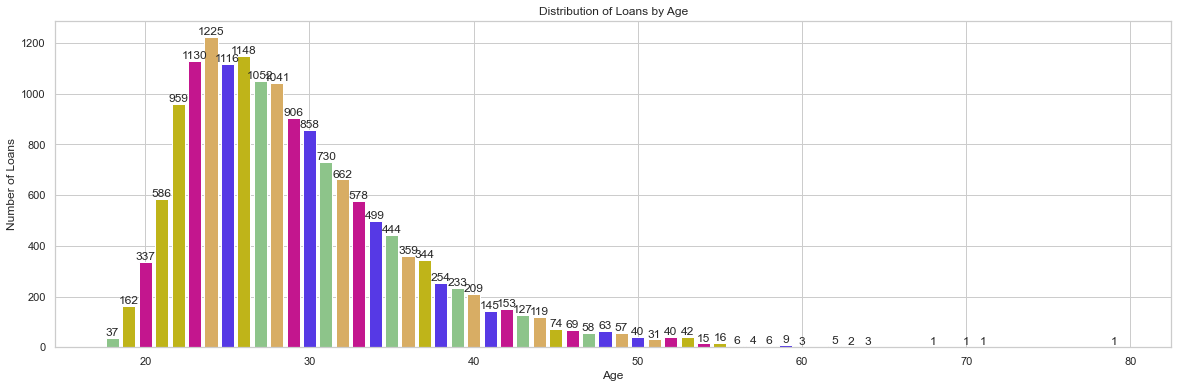

In [102]:
Age = portfolio_data['Age'].value_counts()

plt.figure(figsize=(20, 6))
bars = plt.bar(Age.index, Age.values, color=np.random.rand(5,3))

plt.bar_label(bars, labels=Age.values, label_type='edge')

plt.title('Distribution of Loans by Age')
plt.xlabel('Age')
plt.ylabel('Number of Loans')
plt.show()

#### Distribution of loans by due dates

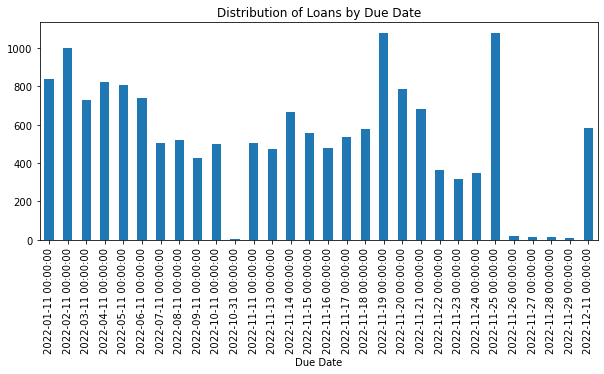

In [23]:
# 4. Distribution of loans by due dates
due_date_counts = portfolio_data.groupby('Due Date')['Loan Number'].count()
plt.figure(figsize=(10, 4))
due_date_counts.plot(kind='bar', title='Distribution of Loans by Due Date')
plt.show()

In [24]:
# Group the loans by due date and calculate the count of loans for each due date
loans_by_due_date = portfolio_data.groupby("Due Date")["Loan Number"].count()
loans_by_due_date

Due Date
2022-01-11     840
2022-02-11     999
2022-03-11     730
2022-04-11     821
2022-05-11     807
2022-06-11     739
2022-07-11     506
2022-08-11     522
2022-09-11     426
2022-10-11     498
2022-10-31       2
2022-11-11     504
2022-11-13     472
2022-11-14     667
2022-11-15     554
2022-11-16     477
2022-11-17     534
2022-11-18     577
2022-11-19    1076
2022-11-20     786
2022-11-21     680
2022-11-22     362
2022-11-23     316
2022-11-24     350
2022-11-25    1080
2022-11-26      17
2022-11-27      12
2022-11-28      15
2022-11-29      11
2022-12-11     580
Name: Loan Number, dtype: int64

In [25]:
# Calculate the mean and median due dates
mean_due_date = portfolio_data['Due Date'].mean().date()
median_due_date = portfolio_data['Due Date'].median().date()

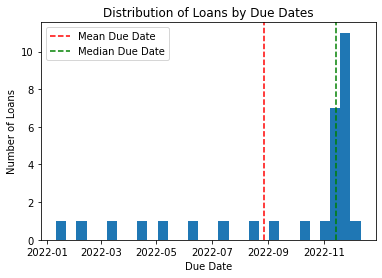

In [26]:
# Create a histogram to visualize the distribution of loans by due date
plt.hist(loans_by_due_date.index, bins=30)
plt.xlabel('Due Date')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loans by Due Dates')
plt.axvline(mean_due_date, color='r', linestyle='--', label='Mean Due Date')
plt.axvline(median_due_date, color='g', linestyle='--', label='Median Due Date')
plt.legend()
plt.show()

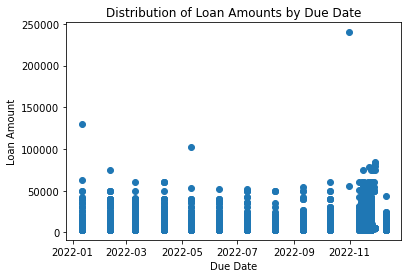

In [27]:
# Create a scatter plot to visualize the relationship between loan amount and due date
plt.scatter(portfolio_data['Due Date'], portfolio_data['Loan Amount'])
plt.xlabel('Due Date')
plt.ylabel('Loan Amount')
plt.title('Distribution of Loan Amounts by Due Date')
plt.show()

#### Unique number of customers contacted every day - only completed calls are to be considered - How many unique borrowers did we contact on day 1, day 2 etc.

In [28]:
CommunicationHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70607 entries, 0 to 70606
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Loan Number                        70607 non-null  int64 
 1   Campaign ID                        70607 non-null  int64 
 2   Communication Operator Message ID  70597 non-null  object
 3   Call time                          70607 non-null  object
 4   Status                             70607 non-null  object
dtypes: int64(2), object(3)
memory usage: 2.7+ MB


In [29]:
# Convert the "Call time" column to datetime format
CommunicationHistory["Call time"] = pd.to_datetime(CommunicationHistory["Call time"])

In [30]:
CommunicationHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70607 entries, 0 to 70606
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype              
---  ------                             --------------  -----              
 0   Loan Number                        70607 non-null  int64              
 1   Campaign ID                        70607 non-null  int64              
 2   Communication Operator Message ID  70597 non-null  object             
 3   Call time                          70607 non-null  datetime64[ns, UTC]
 4   Status                             70607 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 2.7+ MB


In [31]:
# Filter out incomplete calls
completed_calls = CommunicationHistory[CommunicationHistory["Status"] == "completed"]

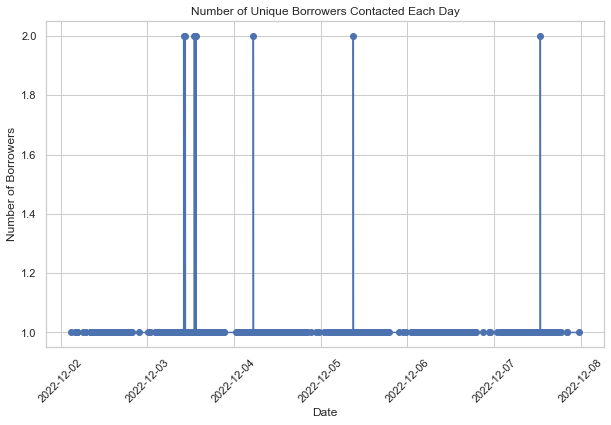

In [103]:
# Get the unique number of borrowers contacted each day
unique_borrowers = completed_calls.groupby('Call time')['Campaign ID'].nunique()

# Plot the number of unique borrowers contacted each day
plt.figure(figsize=(10,6))
plt.plot(unique_borrowers.index, unique_borrowers.values, '-o')
plt.title('Number of Unique Borrowers Contacted Each Day')
plt.xlabel('Date')
plt.ylabel('Number of Borrowers')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Group the completed calls by contact date and Campaign ID, and count the number of unique Campaign IDs for each date
unique_campaign_per_day = completed_calls.groupby(["Call time", "Campaign ID"])["Campaign ID"].nunique()

In [33]:
# Group the unique Campaign counts by date and calculate the sum
total_unique_campaign_per_day = unique_campaign_per_day.groupby("Call time").sum()

In [34]:
total_unique_campaign_per_day

Call time
2022-12-02 02:59:40.973000+00:00    1
2022-12-02 03:57:51.335000+00:00    1
2022-12-02 04:34:26.950000+00:00    1
2022-12-02 04:34:57.213000+00:00    1
2022-12-02 04:36:21.594000+00:00    1
                                   ..
2022-12-07 17:57:44.814000+00:00    1
2022-12-07 18:38:06.691000+00:00    1
2022-12-07 20:03:30.600000+00:00    1
2022-12-07 20:05:00.526000+00:00    1
2022-12-07 23:25:16.448000+00:00    1
Name: Campaign ID, Length: 70545, dtype: int64

In [35]:
# Print the total unique borrowers contacted per day
print("Total Unique campaign Contacted Per Day:")
print(total_unique_campaign_per_day)

Total Unique campaign Contacted Per Day:
Call time
2022-12-02 02:59:40.973000+00:00    1
2022-12-02 03:57:51.335000+00:00    1
2022-12-02 04:34:26.950000+00:00    1
2022-12-02 04:34:57.213000+00:00    1
2022-12-02 04:36:21.594000+00:00    1
                                   ..
2022-12-07 17:57:44.814000+00:00    1
2022-12-07 18:38:06.691000+00:00    1
2022-12-07 20:03:30.600000+00:00    1
2022-12-07 20:05:00.526000+00:00    1
2022-12-07 23:25:16.448000+00:00    1
Name: Campaign ID, Length: 70545, dtype: int64


#### Number of customers not contacted on every day. How many borrowers are not contacted on day 1, day 2 etc.

In [44]:
# Count of unique borrowers contacted every day
unique_borrowers = CommunicationHistory[CommunicationHistory['Status'] == 'completed'].groupby('Call time')['Campaign ID'].nunique()
unique_borrowers

Call time
2022-12-02 02:59:40.973000+00:00    1
2022-12-02 03:57:51.335000+00:00    1
2022-12-02 04:34:26.950000+00:00    1
2022-12-02 04:34:57.213000+00:00    1
2022-12-02 04:36:21.594000+00:00    1
                                   ..
2022-12-07 17:57:44.814000+00:00    1
2022-12-07 18:38:06.691000+00:00    1
2022-12-07 20:03:30.600000+00:00    1
2022-12-07 20:05:00.526000+00:00    1
2022-12-07 23:25:16.448000+00:00    1
Name: Campaign ID, Length: 70545, dtype: int64

In [45]:
# Count of borrowers not contacted every day
not_contacted = CommunicationHistory[~CommunicationHistory['Campaign ID'].isin(CommunicationHistory[CommunicationHistory['Status'] == 'completed']['Campaign ID'])].groupby('Call time')['Campaign ID'].nunique()
not_contacted

Call time
2022-12-04 06:35:31.998000+00:00    1
2022-12-04 07:03:48.583000+00:00    1
2022-12-04 07:23:24.997000+00:00    1
2022-12-04 07:28:52.109000+00:00    1
2022-12-04 08:41:27.604000+00:00    1
2022-12-05 09:55:21.749000+00:00    1
2022-12-05 09:58:23.137000+00:00    1
2022-12-05 10:06:38.407000+00:00    1
2022-12-05 10:06:39.984000+00:00    1
2022-12-05 10:30:44.496000+00:00    1
2022-12-05 11:13:33.937000+00:00    1
2022-12-05 12:34:42.815000+00:00    1
2022-12-05 13:02:20.024000+00:00    1
2022-12-05 13:06:07.643000+00:00    1
2022-12-05 13:22:12.466000+00:00    1
2022-12-05 16:16:54.745000+00:00    1
2022-12-07 07:32:58.105000+00:00    1
2022-12-07 12:03:01.300000+00:00    1
Name: Campaign ID, dtype: int64

#### Who are the customers who have been contacted the most

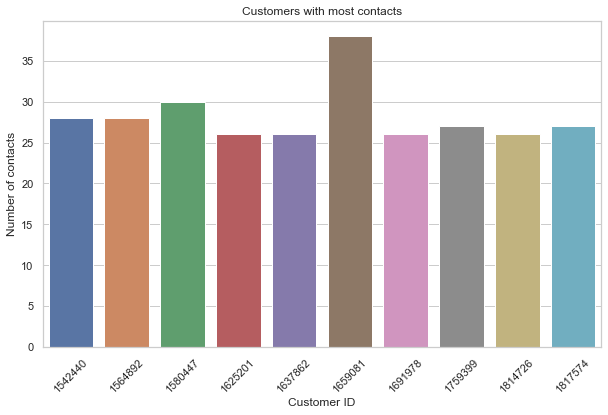

In [71]:
# create a dataframe with customer id and number of times contacted
contacted_count = CommunicationHistory[CommunicationHistory['Status'] == 'completed'].groupby('Loan Number')['Status'].count().reset_index()
contacted_count.columns = ['Loan Number', 'contact_count']

# merge with portfolio data to get customer demographic information
contacted_count = pd.merge(contacted_count, portfolio_data, on='Loan Number')

# sort by contact count in descending order
contacted_count = contacted_count.sort_values('contact_count', ascending=False)

# plot the top 10 customers with most contacts
top_customers = contacted_count.head(10)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loan Number', y='contact_count', data=top_customers)
ax.set_title('Customers with most contacts')
ax.set_xlabel('Customer ID')
ax.set_ylabel('Number of contacts')
plt.xticks(rotation=45)
plt.show()

#### Who are the customers who have been contacted the least

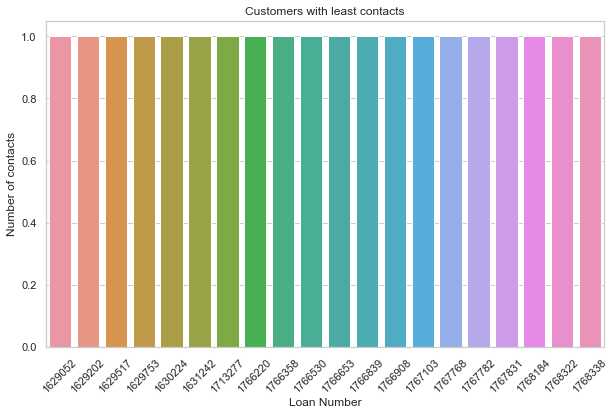

In [79]:
# create a dataframe with customer id and number of times contacted
contacted_count = CommunicationHistory[CommunicationHistory['Status'] == 'completed'].groupby('Loan Number')['Status'].count().reset_index()
contacted_count.columns = ['Loan Number', 'contact_count']

# merge with portfolio data to get customer demographic information
contacted_count = pd.merge(contacted_count, portfolio_data, on='Loan Number')

# sort by contact count in ascending order
contacted_count = contacted_count.sort_values('contact_count', ascending=True)

# plot the top 10 customers with least contacts
bottom_customers = contacted_count.head(20)
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Loan Number', y='contact_count', data=bottom_customers)
ax.set_title('Customers with least contacts')
ax.set_xlabel('Loan Number')
ax.set_ylabel('Number of contacts')
plt.xticks(rotation=45)
plt.show()

#### How many customers have never been reached out?

In [80]:
# Finding customers who have never been contacted
never_contacted = set(portfolio_data['Loan Number']) - set(CommunicationHistory['Loan Number'])
num_never_contacted = len(never_contacted)

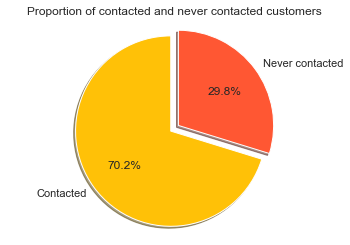

In [82]:
# Pie chart for contacted vs never contacted customers
labels = ['Contacted', 'Never contacted']
sizes = [len(portfolio_data) - num_never_contacted, num_never_contacted]
colors = ['#FFC107', '#FF5733']
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Proportion of contacted and never contacted customers')
plt.show()

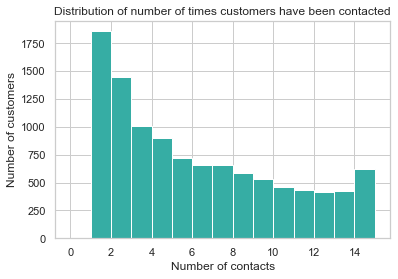

In [85]:
# Histogram of number of times customers have been contacted
contact_counts = CommunicationHistory.groupby('Loan Number').size().reset_index(name='counts')
bins = range(0, 16, 1)
plt.hist(contact_counts['counts'], bins=bins, color='#36ADA4')
plt.xlabel('Number of contacts')
plt.ylabel('Number of customers')
plt.title('Distribution of number of times customers have been contacted')
plt.show()

#### Distribution of calls by states.

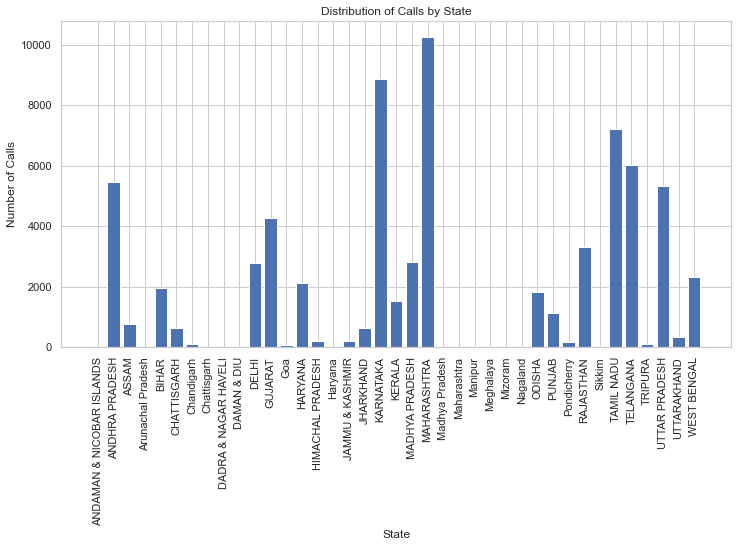

In [86]:
# Merge the CommunicationHistory data with the Portfolio data to get state information
merged_df = pd.merge(CommunicationHistory, portfolio_data, on="Loan Number")

# Count the number of calls made per state
calls_per_state = merged_df.groupby("State")["Status"].count()

# Plot the distribution of calls by state using a bar chart
plt.figure(figsize=(12,6))
plt.bar(calls_per_state.index, calls_per_state.values)
plt.title("Distribution of Calls by State")
plt.xlabel("State")
plt.ylabel("Number of Calls")
plt.xticks(rotation=90)
plt.show()

#### Distribution of calls by campaign ids

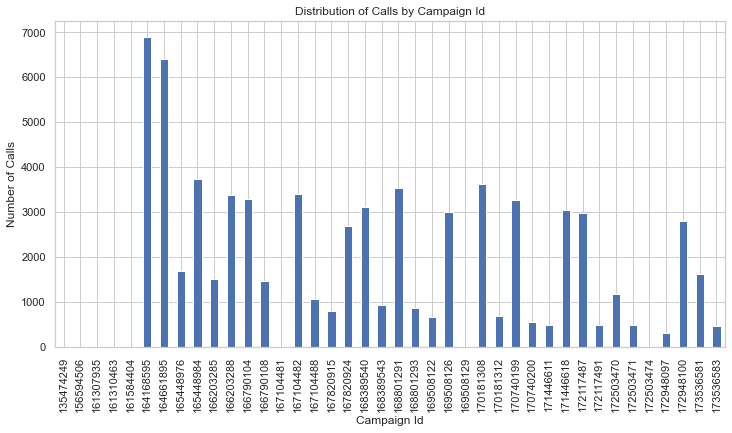

In [89]:
# Group the communication data by CampaignId
campaign_grouped = CommunicationHistory.groupby('Campaign ID')

# Count the number of calls made per CampaignId
call_counts = campaign_grouped.size()
plt.figure(figsize=(12,6))
# Plot the distribution of calls by CampaignId
call_counts.plot(kind='bar', title='Distribution of Calls by Campaign Id')
plt.xlabel('Campaign Id')
plt.ylabel('Number of Calls')
plt.show()

#### Unique number of customers by campaign ID

In [105]:
# group the data by campaign ID and count the unique borrowers contacted in each campaign
unique_customers_by_campaign = CommunicationHistory[CommunicationHistory['Status'] == 'completed'].groupby('Campaign ID')['Loan Number'].nunique()
unique_customers_by_campaign

Campaign ID
135474249       1
156594506       2
161307935       1
161310463       2
161584404       3
164168595    6306
164661895    5833
165448976    1576
165448984    3430
166203285    1450
166203288    3189
166790104    3070
166790108    1408
167104482    3227
167104488    1019
167820915     747
167820924    2578
168389540    2925
168389543     877
168801291    3353
168801293     841
169508122     629
169508126    2878
170181308    3419
170181312     654
170740199    3128
170740200     529
171446611     472
171446618    2902
172117487    2789
172117491     463
172503470    1134
172503471     465
172948097     308
172948100    2663
173536581    1572
173536583     433
Name: Loan Number, dtype: int64

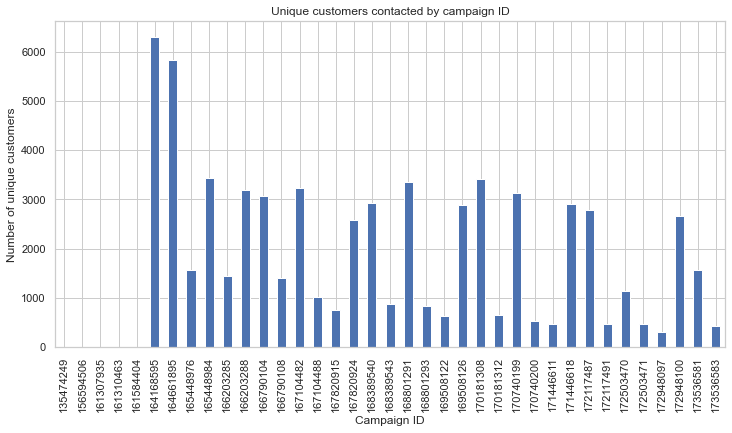

In [92]:
# create a bar chart of unique customers contacted by campaign ID
plt.figure(figsize=(12,6))
unique_customers_by_campaign.plot(kind='bar')
plt.xlabel('Campaign ID')
plt.ylabel('Number of unique customers')
plt.title('Unique customers contacted by campaign ID')
plt.show()